# Directory loading

In [1]:
# import necessary libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pickle
import matplotlib.pyplot as plt


# get current working directory
my_dir = os.getcwd()
print(my_dir[:-15])
# change this accordingly
glioma_path = my_dir[:-15] + "/data/glioma_tumor/"
meningioma_path = my_dir[:-15] + "/data/meningioma_tumor/"
pituitary_path = my_dir[:-15] + "/data/pituitary_tumor/"
normal_path = my_dir[:-15] + "/data/normal_tumor/"

/Users/reese/Documents/School/UC Santa Barbra /PSTAT/PSTAT197/vignette-cnn


# Image Loading

In [2]:
def load_images(path, n_samples):
    '''
    This function will load a random sample of data from the folders
    input: 
        path: folder path
        n_samples: number of images to randomly select (default: 200)
    output: list of images and their labels
    '''
    folder = path.split('/')[-2]
    all_files = os.listdir(path)
    np.random.seed(42) # reproducibility purposes
    selected_files = np.random.choice(all_files, min(n_samples, len(all_files)), replace=False) # Randomly select n_samples files
    data = []
    labels = []
    for file in selected_files:
        img = cv2.imread(os.path.join(path, file)) # read image
        img = cv2.resize(img, (256, 256)) # resize image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to gray scale
        data.append(img)
        labels.append(folder.split('_')[0])
    return data, labels

In [4]:
# load images
n_samples = 200 # good starting point to train model

glioma_data, glioma_labels = load_images(glioma_path, n_samples)
meningioma_data, meningioma_labels = load_images(meningioma_path, n_samples)
pituitary_data, pituitary_labels = load_images(pituitary_path, n_samples)
normal_data, normal_labels = load_images(normal_path, n_samples)

# combine all data and labels
data = glioma_data + meningioma_data + pituitary_data + normal_data 
labels = glioma_labels + meningioma_labels + pituitary_labels + normal_labels # list of strings

# Preprocessing Stage With Pipeline

In [5]:
# flatten data for pipeline
data_flat = np.array(data).reshape(len(data), -1)

# create preprocessing pipeline and one hot encode labels
image_pipeline = Pipeline([
    ('scaler', StandardScaler()) # normalize the data
])
label_encoder = OneHotEncoder()

# apply pipeline to data
data_processed = image_pipeline.fit_transform(data_flat).reshape(-1, 256, 256, 1) # reshape back for convolution layers
labels_processed = label_encoder.fit_transform(np.array(labels).reshape(-1, 1)) # one hot encode labels

In [8]:
# split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data_processed, labels_processed, test_size=0.2, random_state=42)

# TODO: Figure out a method to save the data and labels that can handle the large size and be pushed to github.com

# Display Data

Training labels as one hot encoded: [['meningioma']
 ['normal']
 ['meningioma']
 ['meningioma']
 ['meningioma']]


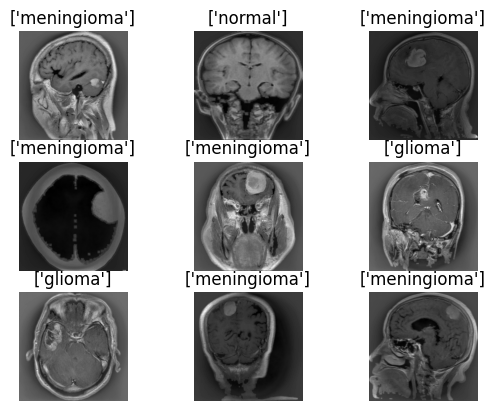

In [7]:
# inverse transform labels
labels = label_encoder.inverse_transform(train_labels)
print(f"Training labels as one hot encoded: {(labels[:5])}")
# show images from training set
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_data[i], cmap="gray")
    plt.axis('off')
    plt.title((labels[i]))
plt.show()